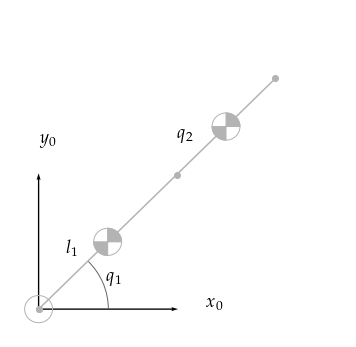

In [22]:
%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib import rc
from matplotlib.patches import Arc, Circle, Wedge

from numpy import sin, cos, pi, matrix, array, eye, degrees

def rot_z(θ):
    from numpy import sin, cos, matrix
    A = matrix([[cos(θ), -sin(θ), 0, 0],
                [sin(θ), cos(θ), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def tras_x(x):
    from numpy import matrix
    A = matrix([[1, 0, 0, x],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

def ejes(axis, origen, orientacion, long=0.5):
    
    i = orientacion[:3, :1].T.tolist()[0]
    j = orientacion[:3, 1:2].T.tolist()[0]
    k = orientacion[:3, 2:3].T.tolist()[0]    
    
    xs, ys, zs = origen.T.tolist()[0]
    us, vs, ws = zip(i)
    axis.quiver(xs, ys, us, vs, scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

    us, vs, ws = zip(j)
    axis.quiver(xs, ys, us, vs, scale=2, scale_units="xy", angles="xy", color="k", width=0.004)

τ = 2*pi
δ = 0.1
l1 = 0.7
q1, q2 = τ/8, 0.5

A1 = rot_z(q1)
A2 = tras_x(l1)
A3 = tras_x(q2)

H1 = A1
H2 = A1*A2
H3 = A1*A2*A3

R1, R2, R3 = H1[:3, :3], H2[:3, :3], H3[:3, :3]
o1, o2, o3 = H1[:3, 3:], H2[:3, 3:], H3[:3, 3:]
x1, x2, x3 = H1[:3, :1], H2[:3, :1], H3[:3, :1]
y1, y2, y3 = H1[:3, 1:2], H2[:3, 1:2], H3[:3, 1:2]

o0 = matrix([[0, 0, 0]]).T
R0 = eye(3)

xs = [o0.item(0), o1.item(0), o2.item(0), o3.item(0)]
ys = [o0.item(1), o1.item(1), o2.item(1), o3.item(1)]

p_l1 = o0 + (l1/5)*x1
p_m1 = o0 + (l1/2)*x1

p_q1 = o0 + (2*l1/7)*x1
p_m2 = o2 + (q2/2)*x3
p_q2 = o2 + (0*q2)*x3

## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
rc('text', usetex=True)

tam=(6, 6)
tls=True

fig = figure(figsize=tam)
ax = fig.gca()

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.axes.spines["top"].set_color("none")
ax.axes.spines["bottom"].set_color("none")
ax.axes.spines["left"].set_color("none")
ax.axes.spines["right"].set_color("none")

ax.axes.set_xlim(-δ, 1 + δ)
ax.axes.set_ylim(-δ, 1 + δ)

eje0 = Circle([o0.item(0), o0.item(1)], 0.05, ec='333')
eje0.set_fill(False)
ax.add_patch(eje0)

wedge1 = Wedge([p_m1.item(0), p_m1.item(1)], 0.05, 0, 90, ec="333", fc="333")
ax.add_patch(wedge1)
wedge2 = Wedge([p_m1.item(0), p_m1.item(1)], 0.05, 180, 270, ec="333", fc="333")
ax.add_patch(wedge2)
eje2 = Circle([p_m1.item(0), p_m1.item(1)], 0.05, ec='333')
eje2.set_fill(False)
ax.add_patch(eje2)

wedge3 = Wedge([p_m2.item(0), p_m2.item(1)], 0.05, 0, 90, ec="333", fc="333")
ax.add_patch(wedge3)
wedge4 = Wedge([p_m2.item(0), p_m2.item(1)], 0.05, 180, 270, ec="333", fc="333")
ax.add_patch(wedge4)
eje3 = Circle([p_m2.item(0), p_m2.item(1)], 0.05, ec='333')
eje3.set_fill(False)
ax.add_patch(eje3)

acot1 = Arc([o0.item(0), o0.item(1)], 0.5, 0.5, 0, 0, degrees(q1), color="666")
ax.add_patch(acot1)

#acot1 = Arc([o1.item(0), o1.item(1)], 0.5, 0.5, 0, degrees(q1), degrees(q1 + q2), color="666")
#ax.add_patch(acot1)

#acot1 = Arc([o2.item(0), o2.item(1)], 0.5, 0.5, 0, degrees(q1 + q2), degrees(q1 + q2 + q3), color="666")
#ax.add_patch(acot1)

ax.plot(xs, ys, "-o", color="333")

ejes(ax, o0, R0)

ax.text(xs[0] + δ + 0.5, ys[0], r'$x_0$', size=18)        
ax.text(xs[0] , ys[0] + 0.5 + δ, r'$y_0$', size=18)

ax.text(p_l1.item(0),     p_l1.item(1) + δ, r'$l_1$', size=18)
ax.text(p_q1.item(0) + δ, p_q1.item(1) - 0.5*δ, r'$q_1$', size=18)
ax.text(p_q2.item(0),     p_q2.item(1) + 1.25*δ, r'$q_2$', size=18)
fig.savefig('polar_centros.png', transparent=True);